In [1]:
import os
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# from s2 lab1
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import graphviz
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

#test test

In [2]:
imdb_raw_link = os.path.join(os.getcwd(), 'datasets', 'imdbFinalMerge.csv')
imdb_raw = pd.read_csv(imdb_raw_link)

In [3]:
imdb_raw


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,0,1,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,0,1
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,1
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,0,0,0,0,0,0,0,0,1,0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,1,0,0,0,0,0,0,0,0,0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,0,1,0,0,0,0,0,0,0,0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,0,0,0,0,0,0,0,1,0,0


In [4]:
treeCols = ['Title','Year', 'Genre','Votes', 'Metascore', 'Runtime (Minutes)','OscarDirectorNomineeWinner','hasOscarActorNomineeWinner',"OscarPictureNomineeWinner",

'Revenue (Millions)',#, 'Budget (Millions)',
 ]#,'Rating']

imdb_tree = imdb_raw.loc[:,treeCols]

imdb_tree = imdb_tree.dropna(how='any')
imdb_tree = imdb_tree[imdb_tree['OscarPictureNomineeWinner']==1]
imdb_tree['OscarPictureNomineeWinner'] = imdb_tree['OscarPictureNomineeWinner'].astype(str)
imdb_tree

,Title,Year,Genre,Votes,Metascore,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,OscarPictureNomineeWinner,Revenue (Millions)
6,La La Land,2016,"Comedy,Drama,Music",258682,93.0,128,0.0,1.0,1,151.06
11,Hidden Figures,2016,"Biography,Drama,History",93103,74.0,127,0.0,1.0,1,169.27
16,Hacksaw Ridge,2016,"Biography,Drama,History",211760,71.0,139,1.0,0.0,1,67.12
18,Lion,2016,"Biography,Drama",102061,69.0,118,0.0,0.0,1,51.69
19,Arrival,2016,"Drama,Mystery,Sci-Fi",340798,81.0,116,0.0,1.0,1,100.50
...,...,...,...,...,...,...,...,...,...,...
785,Captain Phillips,2013,"Biography,Drama,Thriller",346154,83.0,134,1.0,1.0,1,107.10
817,127 Hours,2010,"Adventure,Biography,Drama",294010,82.0,94,1.0,0.0,1,18.33
885,Babel,2006,Drama,253417,69.0,143,0.0,0.0,1,34.30
886,The Tree of Life,2011,"Drama,Fantasy",143517,85.0,139,1.0,1.0,1,13.30


In [5]:

treeCols = ['Runtime (Minutes)','OscarDirectorNomineeWinner','hasOscarActorNomineeWinner',"OscarPictureNomineeWinner",
'Action', 'Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western',
#  'SqrtRevenue','SqrtBudget'
'Revenue (Millions)',#, 'Budget (Millions)',
'Votes', 'Metascore', 'Title']#,'Rating']

imdb_tree = imdb_raw.loc[:,treeCols]

imdb_tree = imdb_tree.dropna(how='any')

imdb_tree['OscarPictureNomineeWinner'] = imdb_tree['OscarPictureNomineeWinner'].astype(str)
imdb_tree

,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,OscarPictureNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Revenue (Millions),Votes,Metascore,Title
0,121,0.0,0.0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,333.13,757074,76.0,Guardians of the Galaxy
1,124,1.0,0.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,126.46,485820,65.0,Prometheus
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,138.12,157606,62.0,Split
3,108,0.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,270.32,60545,59.0,Sing
4,123,0.0,1.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,325.02,393727,40.0,Suicide Squad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,97,0.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,60.13,140900,37.0,Resident Evil: Afterlife
994,88,0.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,54.72,164088,48.0,Project X
996,94,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17.54,73152,46.0,Hostel: Part II
997,98,0.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,58.01,70699,50.0,Step Up 2: The Streets


In [6]:
imdb_tree

,Runtime (Minutes),OscarDirectorNomineeWinner,hasOscarActorNomineeWinner,OscarPictureNomineeWinner,Action,Adventure,Animation,Biography,Comedy,Crime,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Revenue (Millions),Votes,Metascore,Title
0,121,0.0,0.0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,333.13,757074,76.0,Guardians of the Galaxy
1,124,1.0,0.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,126.46,485820,65.0,Prometheus
2,117,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,138.12,157606,62.0,Split
3,108,0.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,270.32,60545,59.0,Sing
4,123,0.0,1.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,325.02,393727,40.0,Suicide Squad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,97,0.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,60.13,140900,37.0,Resident Evil: Afterlife
994,88,0.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,54.72,164088,48.0,Project X
996,94,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17.54,73152,46.0,Hostel: Part II
997,98,0.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,58.01,70699,50.0,Step Up 2: The Streets


In [7]:
X=imdb_tree.drop(['OscarPictureNomineeWinner', 'Title'], axis=1).values
y=imdb_tree['OscarPictureNomineeWinner'].values
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape: (838, 26)
y shape: (838,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=50)

In [9]:
print((X_train.shape))
print((X_test.shape))

(754, 26)
(84, 26)


In [10]:
print(y_train.astype('int').sum()/len(y_train))
print(y_test.astype('int').sum()/len(y_test))

0.07957559681697612
0.05952380952380952


In [11]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)

In [12]:
k_range = range(1,27)
k_scores=[]
for k in k_range:
    rf1 = RandomForestClassifier(n_estimators=100, max_depth= k, random_state=0)
    accuracy = cross_val_score(rf1, X_train, y_train, cv=3, scoring='accuracy') 
    k_scores.append(accuracy.mean())
    # The first parameter is the model object (you do not need to fit it in advance - the function does it automatically) you want to cross validate (you can use cross-validation for any learning algorithm). 
    # The second parameter is the training data (i.e. the 80% you have set aside in the beginning). 
    # The third parameter is the associated target value.
    # 


print(pd.Series(k_scores).max())


0.9495984316701449


<function matplotlib.pyplot.show(close=None, block=None)>

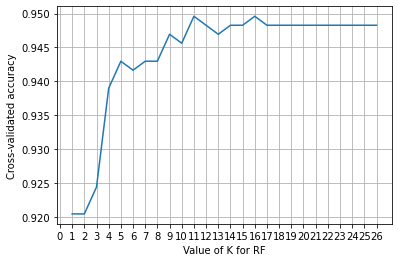

In [13]:
plt.grid()
plt.plot(k_range, k_scores)
    
plt.xlabel('Value of K for RF')
plt.ylabel('Cross-validated accuracy')
plt.xticks(range(0, 27, 1))
plt.show

In [14]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth= 11, random_state=0)
best_rf.fit(X_train, y_train)

prediction_train = best_rf.predict(X=X_train)
prediction_test = best_rf.predict(X=X_test)
print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train,prediction_train)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)))

Classification accuracy on training set: 0.999
Classification accuracy on test set: 0.976


In [15]:
prediction_train = best_rf.predict(X=X_train)
prediction_test = best_rf.predict(X=X_test)
print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train,prediction_train)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)))

Classification accuracy on training set: 0.999
Classification accuracy on test set: 0.976


In [16]:
#  for comman cv
prediction_train = best_rf.predict(X=X_train)
prediction_test = best_rf.predict(X=X_test)
print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train,prediction_train)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)))

Classification accuracy on training set: 0.999
Classification accuracy on test set: 0.976


In [17]:
cm = confusion_matrix(y_train, best_rf.predict(X=X_train))
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
# plt.

print(cm_norm)

[[1.         0.        ]
 [0.01666667 0.98333333]]


<Figure size 432x288 with 0 Axes>

In [18]:
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()

print(cm_norm)

[[1.  0. ]
 [0.4 0.6]]


<Figure size 432x288 with 0 Axes>

In [19]:
for i, column in enumerate(imdb_tree.drop(['OscarPictureNomineeWinner','Title'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, best_rf.feature_importances_[i]))

Importance of feature Runtime (Minutes):, 0.080
Importance of feature OscarDirectorNomineeWinner:, 0.035
Importance of feature hasOscarActorNomineeWinner:, 0.013
Importance of feature Action:, 0.024
Importance of feature Adventure:, 0.011
Importance of feature Animation:, 0.003
Importance of feature Biography:, 0.033
Importance of feature Comedy:, 0.013
Importance of feature Crime:, 0.011
Importance of feature Drama:, 0.040
Importance of feature Family:, 0.006
Importance of feature Fantasy:, 0.013
Importance of feature History:, 0.017
Importance of feature Horror:, 0.004
Importance of feature Music:, 0.003
Importance of feature Musical:, 0.005
Importance of feature Mystery:, 0.010
Importance of feature Romance:, 0.009
Importance of feature Sci-Fi:, 0.008
Importance of feature Sport:, 0.004
Importance of feature Thriller:, 0.012
Importance of feature War:, 0.005
Importance of feature Western:, 0.006
Importance of feature Revenue (Millions):, 0.127
Importance of feature Votes:, 0.191
Imp

In [20]:
feature_list = []
value_list = []
for i, column in enumerate(imdb_tree.drop(['OscarPictureNomineeWinner', 'Title'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, best_rf.feature_importances_[i]))
    feature_list.append(column)
    value_list.append(best_rf.feature_importances_[i])

featureImportanceDf = pd.DataFrame(value_list, index=feature_list, columns=['Feature Importance'])
# passengers_list = [['Male', 22.0, False], ['Female', 38.0, True]]
# passengers = pd.DataFrame(passengers_list, index=['Mr. Owen Harris Braund', 'Mrs. John Bradley Cumings'],
#                           columns=['Gender'
featureImportanceDf

Importance of feature Runtime (Minutes):, 0.080
Importance of feature OscarDirectorNomineeWinner:, 0.035
Importance of feature hasOscarActorNomineeWinner:, 0.013
Importance of feature Action:, 0.024
Importance of feature Adventure:, 0.011
Importance of feature Animation:, 0.003
Importance of feature Biography:, 0.033
Importance of feature Comedy:, 0.013
Importance of feature Crime:, 0.011
Importance of feature Drama:, 0.040
Importance of feature Family:, 0.006
Importance of feature Fantasy:, 0.013
Importance of feature History:, 0.017
Importance of feature Horror:, 0.004
Importance of feature Music:, 0.003
Importance of feature Musical:, 0.005
Importance of feature Mystery:, 0.010
Importance of feature Romance:, 0.009
Importance of feature Sci-Fi:, 0.008
Importance of feature Sport:, 0.004
Importance of feature Thriller:, 0.012
Importance of feature War:, 0.005
Importance of feature Western:, 0.006
Importance of feature Revenue (Millions):, 0.127
Importance of feature Votes:, 0.191
Imp

,Feature Importance
Runtime (Minutes),0.080350
OscarDirectorNomineeWinner,0.035176
hasOscarActorNomineeWinner,0.013350
Action,0.024128
Adventure,0.010743
Animation,0.002775
Biography,0.032596
Comedy,0.012836
Crime,0.010947
Drama,0.039711


## ## The graph below means is the feature importance of each variable

[Text(0, 0, '0.318'),
 Text(0, 0, '0.191'),
 Text(0, 0, '0.127'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.035'),
 Text(0, 0, '0.033'),
 Text(0, 0, '0.024'),
 Text(0, 0, '0.017'),
 Text(0, 0, '0.013')]

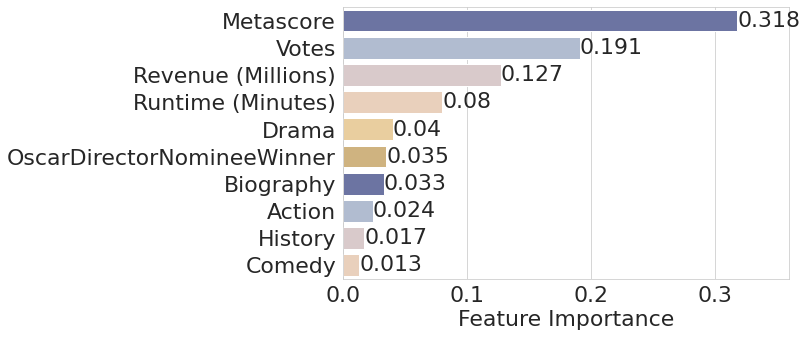

In [21]:

# sns.set_color_codes("pastel")
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 22
plt.figure(figsize=(8,5))
featureImportanceDf['Feature Importance'] =featureImportanceDf['Feature Importance'].apply(lambda x: round(x, 3))
featureImportanceDf = featureImportanceDf.sort_values("Feature Importance", ascending=False)
featureImportanceDf_top10 = featureImportanceDf.head(10)
ax1 = sns.barplot(x="Feature Importance", y=featureImportanceDf_top10.index, data=featureImportanceDf_top10,
             palette= sns.color_palette(['#636dab', '#acbad5','#dbc7c9','#f1cfb4','#f5d193','#dcb773']) )
ax1.set_xlim([0,0.36])
ax1.bar_label(ax1.containers[0])



In [22]:
imdb_oscarpicture = imdb_raw[imdb_raw['OscarPictureNomineeWinner']==1]

imdb_oscarpicture


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,...,0,0,0,0,0,0,0,0,0,1
11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,...,0,0,0,0,0,0,0,0,0,1
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,...,0,0,0,0,0,0,0,0,0,1
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,...,0,0,0,0,0,0,0,0,0,1
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,Babel,Drama,Tragedy strikes a married couple on vacation i...,Alejandro González Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...",2006,143,7.5,253417,...,0,0,0,0,0,0,0,0,0,0
886,887,The Tree of Life,"Drama,Fantasy","The story of a family in Waco, Texas in 1956. ...",Terrence Malick,"Brad Pitt, Sean Penn, Jessica Chastain, Hunter...",2011,139,6.8,143517,...,0,0,0,0,1,0,0,0,0,0
939,940,Up in the Air,"Drama,Romance",Ryan Bingham enjoys living out of a suitcase f...,Jason Reitman,"George Clooney, Vera Farmiga, Anna Kendrick,Ja...",2009,109,7.4,279694,...,0,0,1,0,0,0,0,0,0,0
951,952,The Descendants,"Comedy,Drama",A land baron tries to reconnect with his two d...,Alexander Payne,"George Clooney, Shailene Woodley, Amara Miller...",2011,115,7.3,211348,...,0,0,0,0,1,0,0,0,0,0


## The graph below means the number of Oscar movies in each genre

6
13
2
19
12
6
61
1
5
10
0
2
1
2
10
7
2
12
1
2


[Text(0, 0, '61'),
 Text(0, 0, '19'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

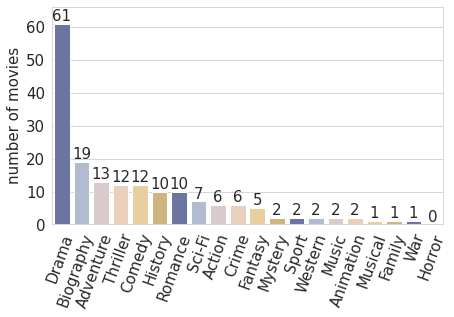

In [23]:
genre = ['Action', 'Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western']
countList=[]
plt.rcParams['font.size'] = 15
for i in range(0, len(genre)):
    temp = imdb_oscarpicture[genre[i]].sum()
    print(temp)
    countList.append(temp)

plt.figure(figsize=(7,4))
countSeries= pd.Series(countList, index=genre)
countSeries = countSeries.sort_values(ascending = False)
# countSeries = countSeries.head(10)
countSeries
# plt.figure(figsize=(7,5))
sns.barplot(y=countSeries, x=countSeries.index, 
            palette=sns.color_palette(['#636dab', '#acbad5','#dbc7c9','#f1cfb4','#f5d193','#dcb773']))
plt.xticks(rotation=70, rotation_mode='anchor', horizontalalignment="right")
plt.ylabel('number of movies')
plt.ylim([0,66])
ax1= plt.gca()
ax1.bar_label(ax1.containers[0])
# sns.set_style('darkgrid')
# ax2 = plt.gca()    , ha='right',
# ax2.set_xticklabels(labels = ax2.get_xticklabels(),rotation=60, ha='right', rotation_mode='anchor')

In [24]:
# genre = ['Adventure','Animation','Biography','Comedy','Crime',
# 'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
# 'Romance','Sci-Fi','Sport','Thriller','War','Western']

# imdb_stack = imdb_oscarpicture[imdb_oscarpicture['Action']==1] 
# imdb_stack = imdb_genre.loc[:,['Title','Metascore', 'Revenue (Millions)','Year']]
# imdb_genre['Genre'] = 'Action'
# for i in range(0, len(genre)):
#     temp = imdb_oscarpicture[imdb_oscarpicture[genre[i]]==1] 
#     temp = temp.loc[:,['Title','Metascore', 'Revenue (Millions)','Year']]
#     temp.loc[:,['Genre']] = genre[i]
#     # print(temp)
#     imdb_genre = pd.concat([imdb_genre, temp], ignore_index=True)

# imdb_genre

In [25]:
imdb_stack = imdb_raw[imdb_raw['OscarPictureNomineeWinner']==1]

In [26]:
imdb_stack

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,...,0,0,0,0,0,0,0,0,0,1
11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,...,0,0,0,0,0,0,0,0,0,1
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,...,0,0,0,0,0,0,0,0,0,1
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,...,0,0,0,0,0,0,0,0,0,1
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,Babel,Drama,Tragedy strikes a married couple on vacation i...,Alejandro González Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...",2006,143,7.5,253417,...,0,0,0,0,0,0,0,0,0,0
886,887,The Tree of Life,"Drama,Fantasy","The story of a family in Waco, Texas in 1956. ...",Terrence Malick,"Brad Pitt, Sean Penn, Jessica Chastain, Hunter...",2011,139,6.8,143517,...,0,0,0,0,1,0,0,0,0,0
939,940,Up in the Air,"Drama,Romance",Ryan Bingham enjoys living out of a suitcase f...,Jason Reitman,"George Clooney, Vera Farmiga, Anna Kendrick,Ja...",2009,109,7.4,279694,...,0,0,1,0,0,0,0,0,0,0
951,952,The Descendants,"Comedy,Drama",A land baron tries to reconnect with his two d...,Alexander Payne,"George Clooney, Shailene Woodley, Amara Miller...",2011,115,7.3,211348,...,0,0,0,0,1,0,0,0,0,0


In [27]:
year_list = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
imdb_stack2 = pd.DataFrame(year_list, columns=['Year'])

genreList2 = ['Action','Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western']
currGenreCount = []


for i in range(len(genreList2)):
    countList=[]
    for j in range(2006, 2017):
        temp2 = imdb_stack[imdb_stack['Year']==j]
        currCount = temp2[genreList2[i]].sum()
        
        countList.append(currCount)
    imdb_stack2[genreList2[i]] = pd.Series(countList)

imdb_stack2


,Year,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2006,0,0,0,0,1,1,3,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2007,0,0,0,0,1,1,4,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2008,0,0,0,0,0,0,3,0,1,...,0,0,0,0,1,0,0,1,0,0
3,2009,2,3,1,1,1,0,3,0,1,...,0,0,0,0,1,1,1,1,1,0
4,2010,2,4,1,4,1,0,7,0,0,...,0,0,0,0,0,1,0,1,0,1
5,2011,0,1,0,1,2,0,5,1,2,...,0,0,0,0,1,0,1,0,0,0
6,2012,0,1,0,1,1,0,6,0,1,...,0,0,1,0,2,0,0,1,0,1
7,2013,0,0,0,4,1,2,6,0,0,...,0,0,0,0,1,2,0,2,0,0
8,2014,1,1,0,4,2,0,8,0,0,...,0,1,0,0,2,0,0,1,0,0
9,2015,1,3,0,1,1,1,7,0,0,...,0,0,0,0,1,2,0,2,0,0


## Lines are overlapping, we don't use this 

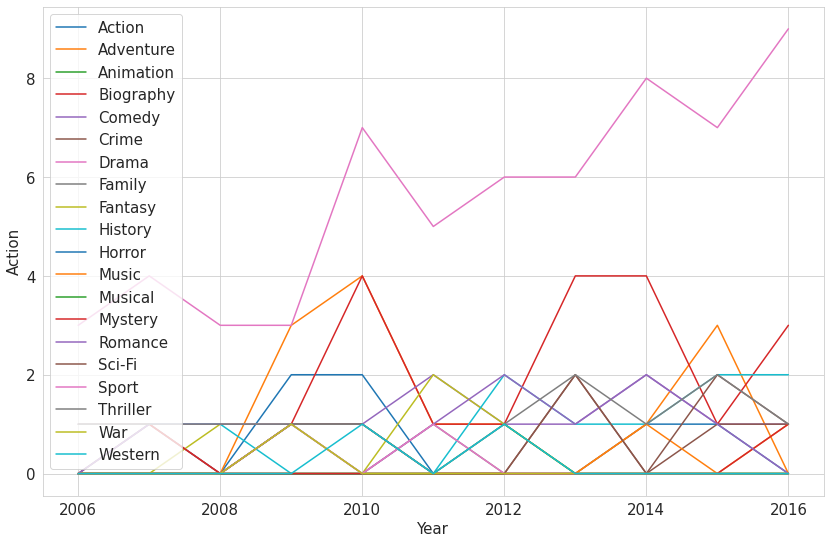

In [28]:
# sns.lineplot(x='Year', y='Drama', data=imdb_stack2)
# sns.lineplot(x='Year', y='Biography', data=imdb_stack2)
# sns.lineplot(x='Year', y='Romance', data=imdb_stack2)
# sns.lineplot(x='Year', y='Adventure', data=imdb_stack2)


import matplotlib.ticker as ticker


fig, ax = plt.subplots(figsize=(14, 9))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
for each in genreList2:
    sns.lineplot(data = imdb_stack2, x ='Year', y = each, label = str(each), ci = None)
plt.legend()
plt.show()

In [29]:
print(len(genreList2))

20


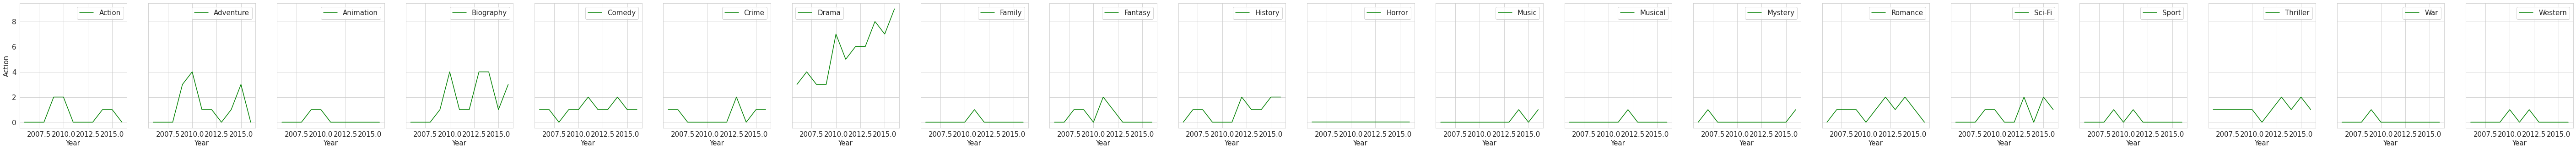

In [30]:
fig, axes = plt.subplots(1, 20, figsize=(100, 5), sharey=True)

columns_plot = ['Composure', 'Marking', 'Penalties', 'Vision', 'Stamina']

for i, each in enumerate(genreList2):
    sns.lineplot(data = imdb_stack2, ax = axes[i], x = 'Year', y = each, ci = None, label = str(each),color = 'g')
plt.show()

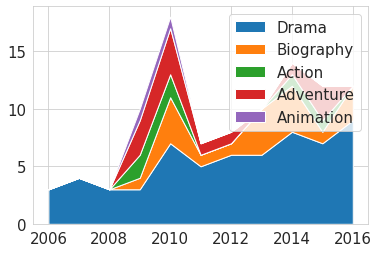

In [31]:

plt.stackplot(imdb_stack2['Year'], # x value 
              imdb_stack2['Drama'], # y1 value  
              imdb_stack2['Biography'], 
              imdb_stack2['Action'],
              imdb_stack2['Adventure'],
              imdb_stack2['Animation'],
               
              )
plt.legend(['Drama', 'Biography','Action','Adventure','Animation'])

In [32]:
genre = ['Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western']

imdb_genre = imdb_oscarpicture[imdb_oscarpicture['Action']==1] 
imdb_genre = imdb_genre.loc[:,['Title','Metascore', 'Revenue (Millions)','Year']]
imdb_genre['Genre'] = 'Action'
for i in range(0, len(genre)):
    temp = imdb_oscarpicture[imdb_oscarpicture[genre[i]]==1] 
    temp = temp.loc[:,['Title','Metascore', 'Revenue (Millions)','Year']]
    temp.loc[:,['Genre']] = genre[i]
    # print(temp)
    imdb_genre = pd.concat([imdb_genre, temp], ignore_index=True)

imdb_genre

,Title,Metascore,Revenue (Millions),Year,Genre
0,Mad Max: Fury Road,90.0,153.63,2015,Action
1,Inception,74.0,292.57,2010,Action
2,Avatar,83.0,760.51,2009,Action
3,American Sniper,72.0,350.12,2014,Action
4,District 9,81.0,115.65,2009,Action
...,...,...,...,...,...
169,The Hurt Locker,94.0,15.70,2008,Thriller
170,Captain Phillips,83.0,107.10,2013,Thriller
171,Inglourious Basterds,69.0,120.52,2009,War
172,Django Unchained,81.0,162.80,2012,Western


<AxesSubplot:xlabel='OscarPictureNomineeWinner', ylabel='Metascore'>

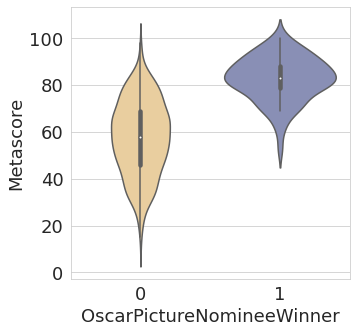

In [33]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 18
plt.figure(figsize=(5,5))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5))
colors = ['#f5d193', "#828abc"]
sns.set_style("whitegrid")
# Set your custom color palette


# colors2 = ['#d3ddbd', '#a3ca9c','#5d9e8c','#6F8BBC']
sns.violinplot(data=imdb_tree, x='OscarPictureNomineeWinner', y="Metascore", palette=sns.color_palette(colors))


# g1=sns.violinplot(ax=ax2,data=imdb_tree, x='OscarPictureNomineeWinner', y="Revenue (Millions)", palette=sns.color_palette(colors))


# g.set_yticks(range(11))





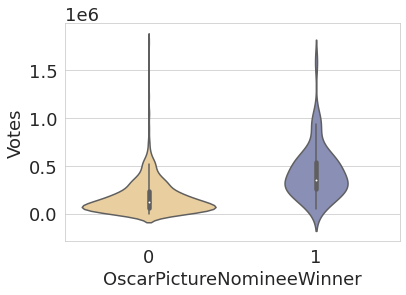

In [34]:

colors2 = ['#d3ddbd', '#a3ca9c','#5d9e8c','#6F8BBC']
sns.set_style("whitegrid")
sns.violinplot(data=imdb_tree, x='OscarPictureNomineeWinner', y="Votes", palette=sns.color_palette(colors))
plt.show()



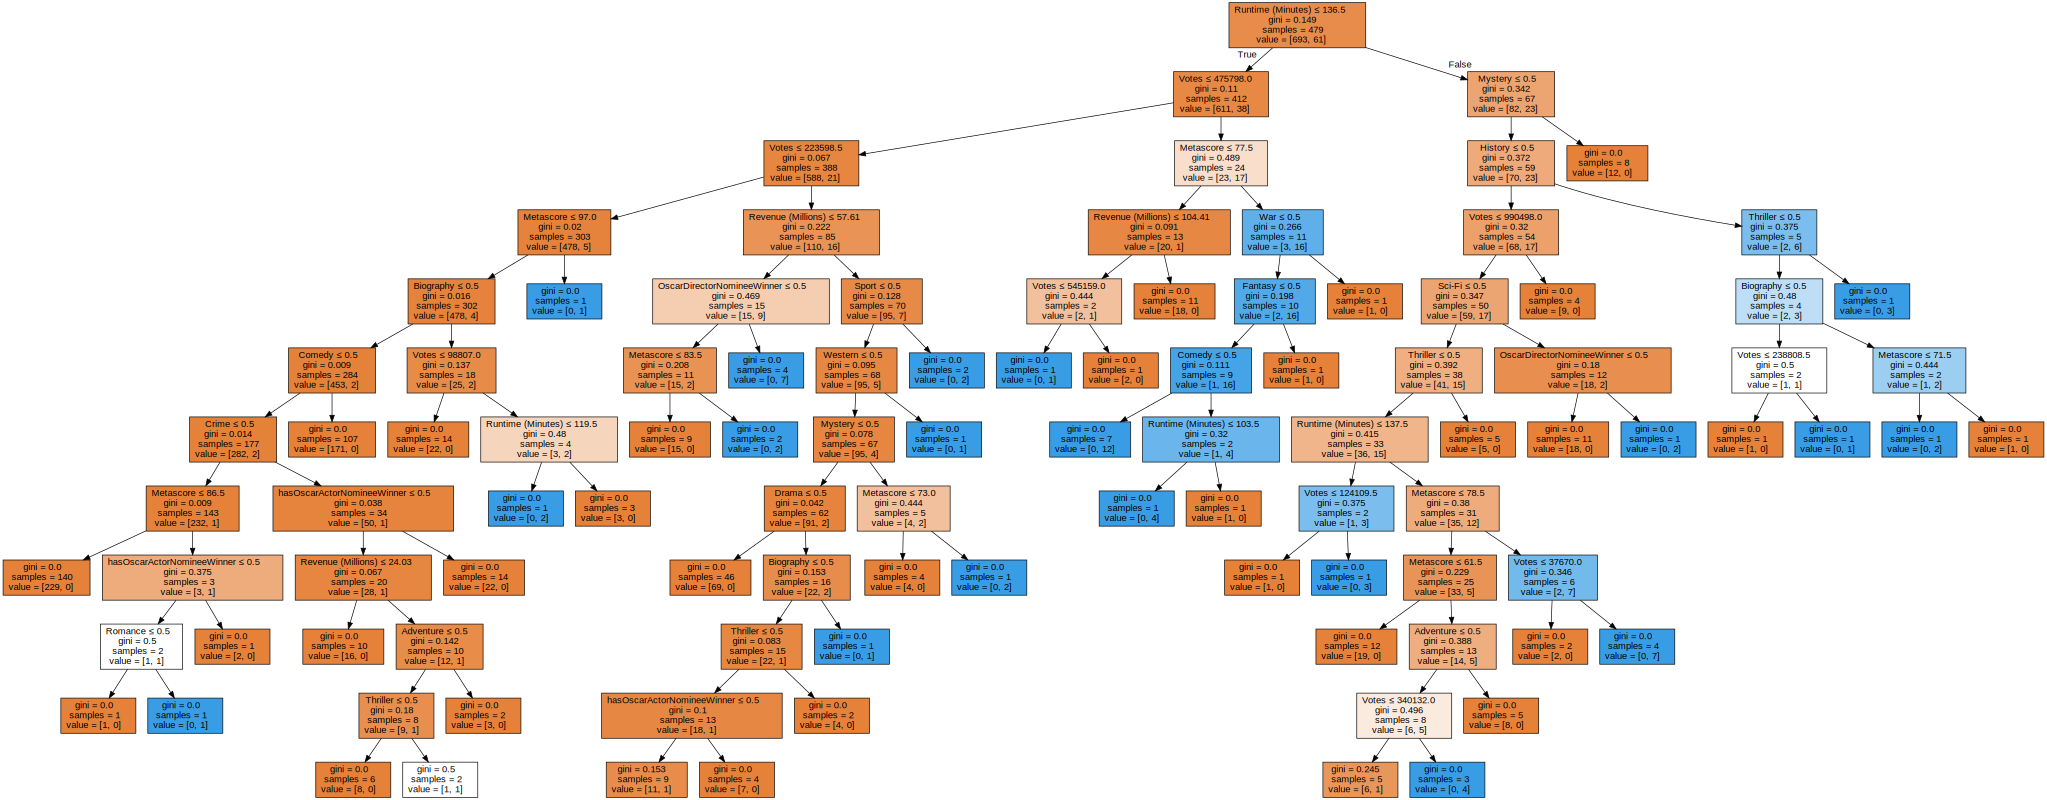

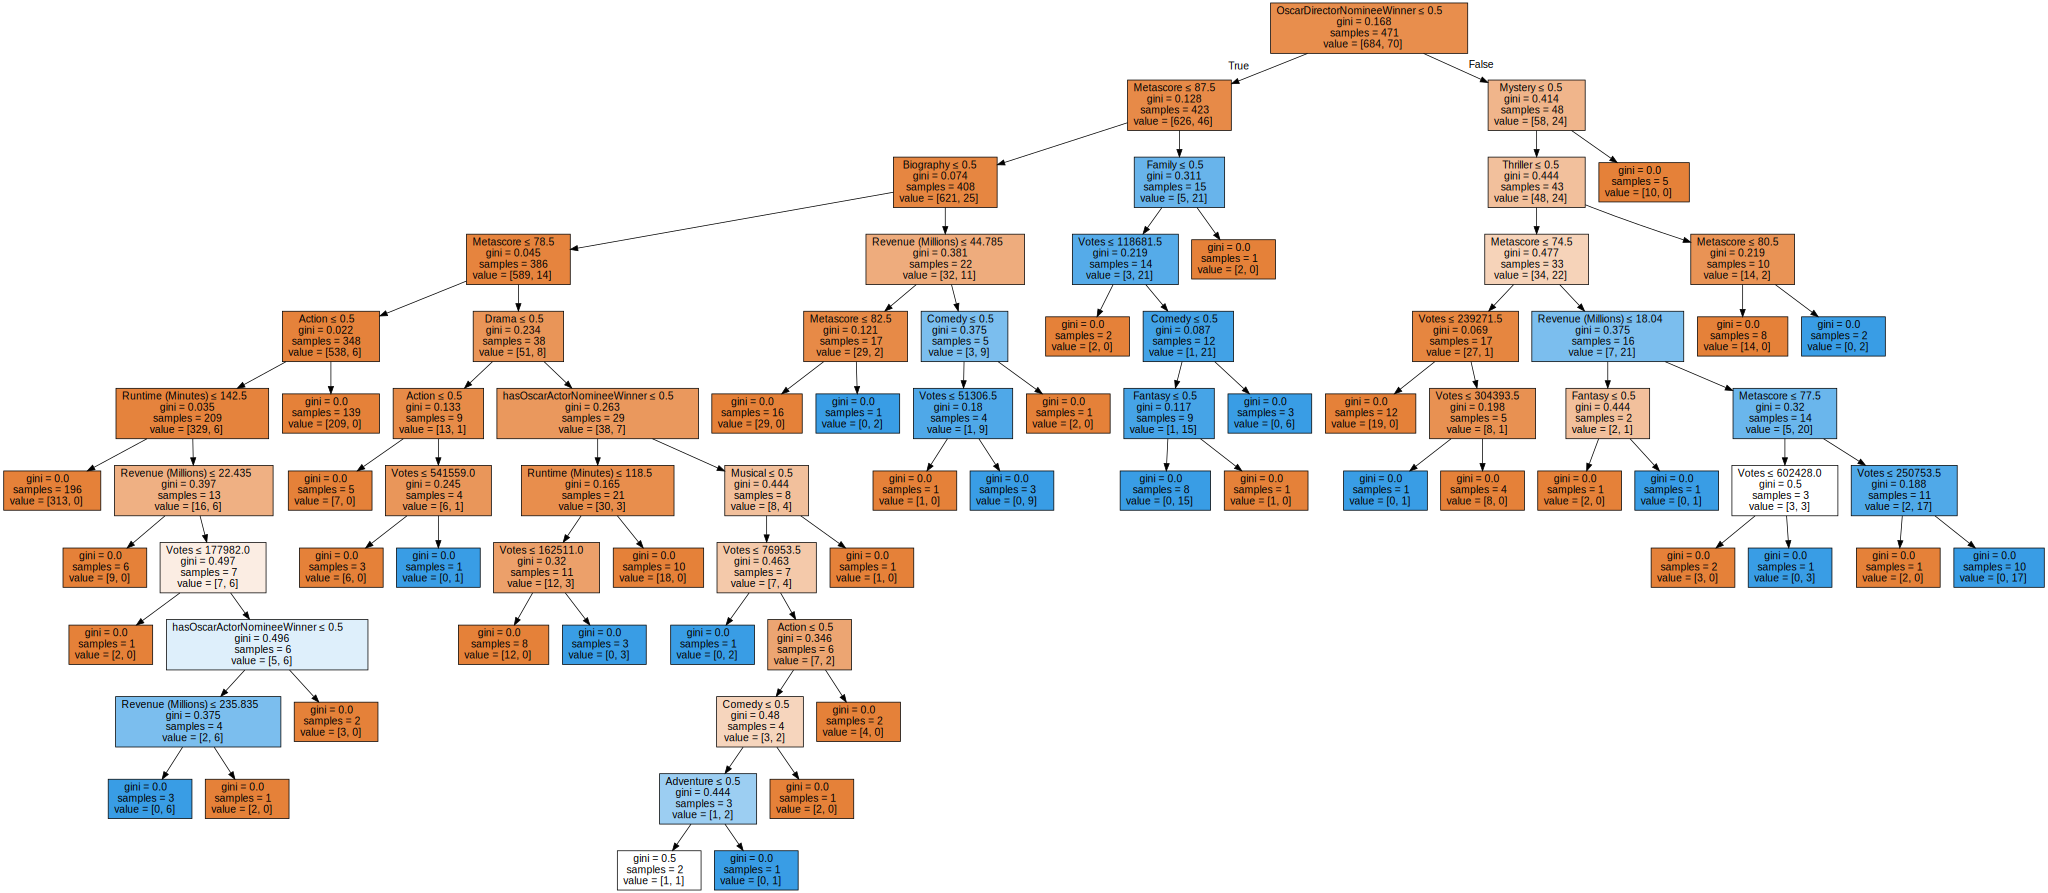

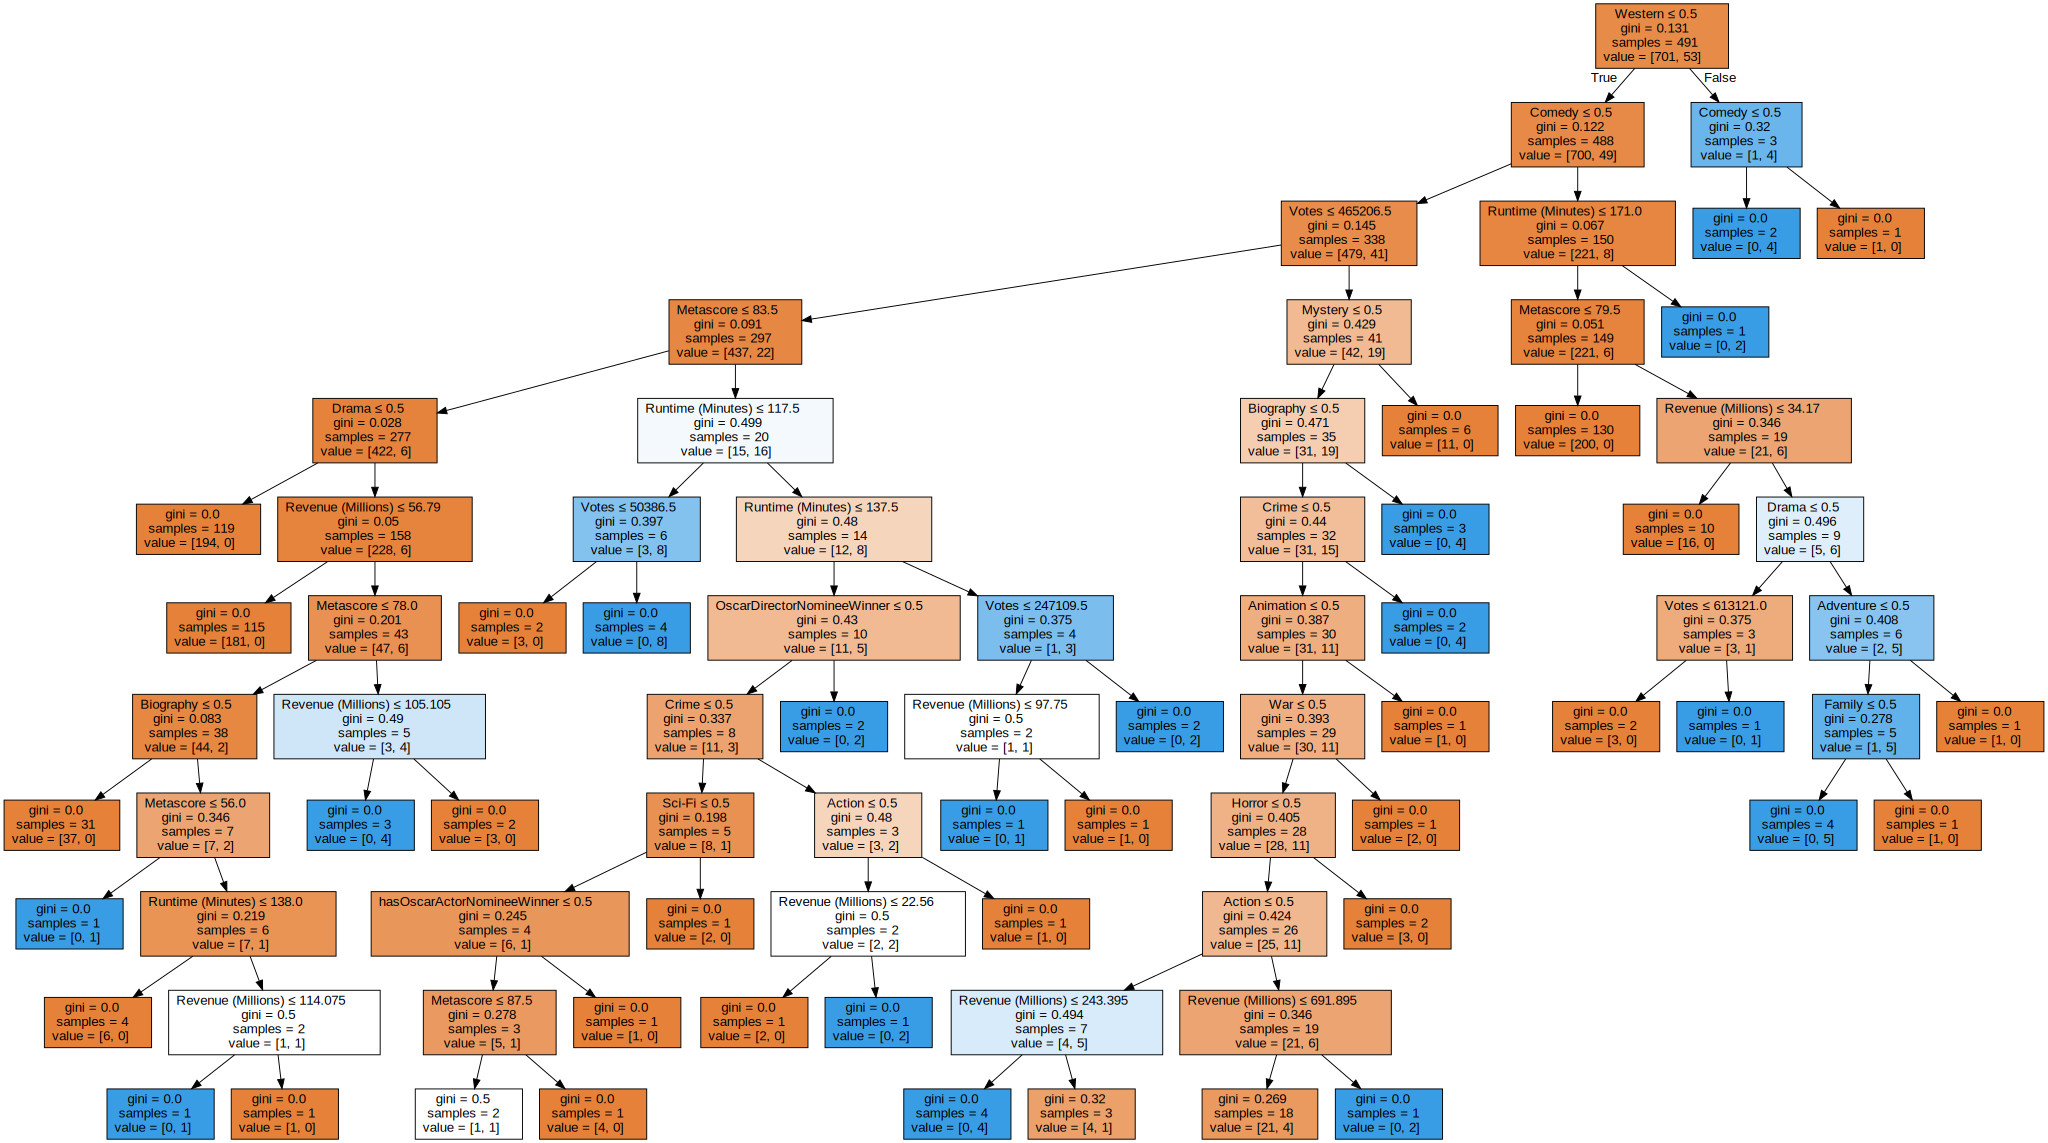

In [35]:
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=imdb_tree.drop(['OscarPictureNomineeWinner','Title'], axis=1).columns,  
                               filled=True,  
                               max_depth=11, 
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02d6283e-b942-4af8-8973-cba3d72db73f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>